In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [4]:
# Create Synthetic dataset
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0) 

In [5]:
X

array([[ 1.10321333, -0.60226447],
       [ 1.07789678, -0.19634016],
       [-1.11222204, -0.21789221],
       ...,
       [-0.06974103,  0.62382439],
       [-1.12218125,  0.20533283],
       [-0.45090717,  1.0086787 ]])

In [6]:
y

array([-3.11172714e+00,  2.40198628e+01, -5.84039718e+01,  3.80251813e+01,
        1.72754442e+02,  1.15117550e+01,  5.54330959e+01, -1.20511819e+02,
       -3.84523287e+01, -4.97341075e+01, -7.66653070e+01,  6.34394867e+01,
        1.30413109e+02,  6.27903387e+01, -3.08616996e+01, -4.92967943e+01,
       -9.83673578e+01,  1.59699131e+01,  1.16326492e+02, -1.22458614e+01,
       -1.36319090e+02, -6.60957222e+01,  1.41290692e+02, -1.76712172e+02,
       -3.42689115e+01,  9.80299539e+01, -1.49657264e+02, -2.98851700e+01,
       -1.22192119e+02,  7.65156355e+01,  1.40013113e+02, -1.13351659e+02,
        1.02274308e+02, -2.66625752e+01,  4.46297136e+01, -1.80984429e+02,
       -2.16138365e+01,  3.59050173e+01,  7.94163762e+01,  1.65215002e+02,
        1.22829550e+02,  4.21760554e+01, -2.36743430e+02,  1.33008221e+02,
       -7.07608630e+01,  1.98568948e+01, -7.48774934e+01, -1.19309074e+01,
        9.71646232e+01, -2.04043342e+02,  1.60682153e+02, -3.42621470e+01,
        2.58163165e+01, -

In [7]:
pd.DataFrame(X)[0]

0      1.103213
1      1.077897
2     -1.112222
3      0.000376
4      0.504583
         ...   
995   -1.164107
996    0.228395
997   -0.069741
998   -1.122181
999   -0.450907
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

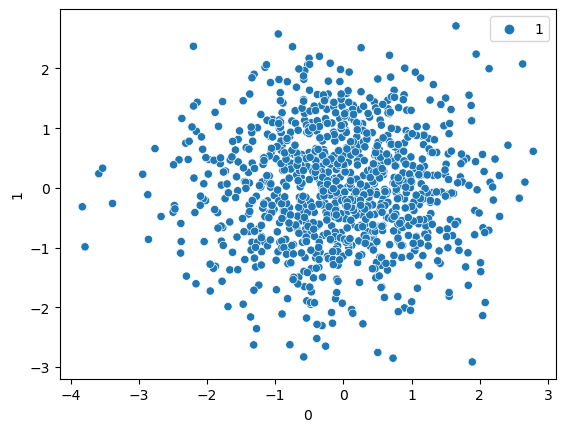

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=1)

In [10]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=10)

## SVR - Support Vector Regression

In [11]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [13]:
# Coffecient
svr.coef_

array([[37.65880244, 82.34490325]])

In [16]:
# Prediction
y_pred = svr.predict(X_test)
y_pred

array([-1.54341778e+02,  9.76080356e+01, -1.42127242e-01,  3.54274387e+01,
        8.35509802e+01, -1.28573770e+02,  4.16207365e+01, -1.63679537e+02,
        5.92978266e+01,  8.19668229e+01,  1.13725508e+02,  2.69811836e+02,
        1.27672228e+02, -1.14205551e+02, -1.57739761e+02, -1.75910308e+02,
       -4.51301605e+01,  3.91123902e+01, -1.31834958e+02,  1.79771186e+01,
       -6.65756638e+01,  1.10515253e+01,  7.42225481e+01, -3.81777016e+01,
        8.15844231e+00, -9.52155370e+01,  3.53339202e+01,  1.48164033e+01,
        2.80707141e+01, -7.76679543e+01,  1.89640068e+00,  1.93356021e+01,
        9.72835909e+01, -7.36769170e+00,  3.89249954e+01, -7.44511856e+01,
       -4.96696909e+01,  6.34854031e+00,  6.77922014e-01, -5.32706172e+01,
       -3.68934526e+01, -4.64341391e+01,  8.07474370e+01, -2.49670626e+00,
       -1.76864341e+02, -1.18766762e+02, -1.78943208e+02, -1.21109631e+01,
        4.01849579e+01,  1.12586428e+02, -3.08412048e+01, -1.02924756e+02,
       -1.40370775e+01, -

In [21]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9987834470610086


In [22]:
# Hyperparameter Tuning with SVR

from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['linear']
             }

In [23]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [24]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.753 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.758 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.739 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.753 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.758 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.739 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [27]:
# Prediction
y_pred1 = grid.predict(X_test)
y_pred1

array([-1.55230446e+02,  9.82827987e+01, -7.29378939e-02,  3.57228983e+01,
        8.41509360e+01, -1.29296625e+02,  4.19495514e+01, -1.64633454e+02,
        5.97410300e+01,  8.25494541e+01,  1.14498626e+02,  2.71569058e+02,
        1.28539088e+02, -1.14847345e+02, -1.58651958e+02, -1.76936901e+02,
       -4.53384506e+01,  3.94252761e+01, -1.32581083e+02,  1.81612127e+01,
       -6.69162310e+01,  1.11937851e+01,  7.47615467e+01, -3.83404827e+01,
        8.28563916e+00, -9.57332427e+01,  3.56193972e+01,  1.49837971e+01,
        2.83224675e+01, -7.80808771e+01,  1.97749296e+00,  1.95283531e+01,
        9.79646677e+01, -7.34291614e+00,  3.92365753e+01, -7.48354024e+01,
       -4.99006212e+01,  6.46391576e+00,  7.52785812e-01, -5.35288364e+01,
       -3.70556657e+01, -4.66566049e+01,  8.13268819e+01, -2.44548282e+00,
       -1.77888132e+02, -1.19434754e+02, -1.79989902e+02, -1.21134887e+01,
        4.05150443e+01,  1.13361214e+02, -3.09570329e+01, -1.03494988e+02,
       -1.40505895e+01, -

In [28]:
# r2_score

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred1))

0.998834790712896
